Here I use the XRD output of Ryan's VASP calculations to model the Bragg peak ratio as a function of incident flux in the 0-5 eV range

In [1]:
%matplotlib notebook
import numpy as np
from scipy.interpolate import interp1d as interp
import matplotlib.pyplot as plt
import MgOdos
import pandas as pd

In [2]:
T, i200, i111 = np.genfromtxt('VASP_Bragg_peaks.dat').T

In [3]:
avogadro = 6.022 * 10**23
to_ev = 6.24e18
peratom = lambda I, mu, M, rho: I * M / (mu * rho * avogadro)
to_ev * 2.4e-17

def flux_to_ev(flux):
    return peratom(flux, .015, 40.3, 3.6) * to_ev

def ev_to_flux(ev):
    return ev / (peratom(1., .015, 40.3, 3.6) * to_ev)

In [17]:
flux_to_ev(150)

1.1599690025462195

In [4]:
list(map(flux_to_ev, np.array([ 19933.65 ,  13085.55 ,   8590.5  ,   5639.4  ,   3702.06 ,
         2430.315,   1595.43 ,   1047.33 ,    687.555,    451.35 ])))

[154.14944071736966,
 101.19221587512455,
 66.431424775821981,
 43.610194619727665,
 28.628498970441711,
 18.793933776154102,
 12.3376623048821,
 8.0991355695782126,
 5.3169499169711054,
 3.4903467286615744]

In [5]:
tgrid = np.arange(0, 5, 0.1)

In [6]:
ugrid = MgOdos.U_of_T(tgrid)

<IPython.core.display.Javascript object>


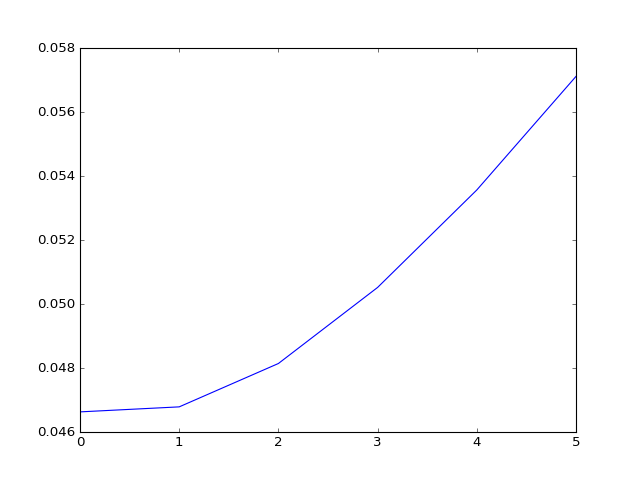

In [7]:
plt.plot(i111/i200)

In [8]:
vasp_u_to_i111 = interp(MgOdos.U_of_T(T), (i200[0]/i111[0]) * i111/i200)

<IPython.core.display.Javascript object>


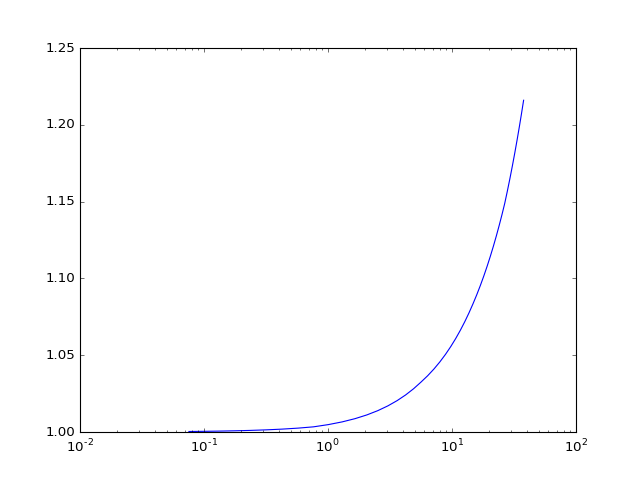

In [10]:
plt.semilogx()
plt.plot(ugrid, vasp_u_to_i111(ugrid))

<IPython.core.display.Javascript object>


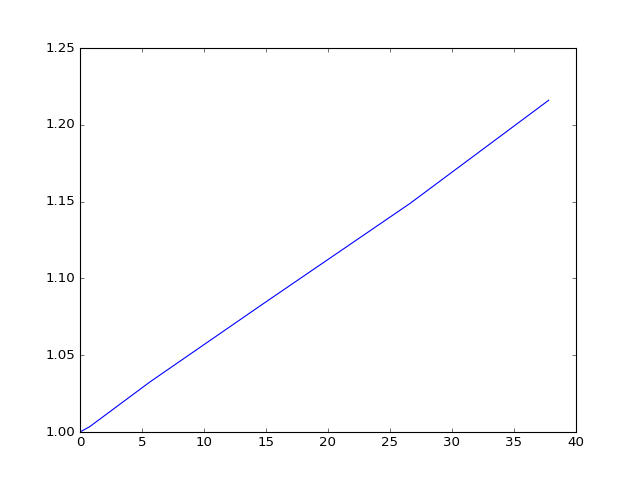

In [11]:
plt.plot(ugrid, vasp_u_to_i111(ugrid))

In [12]:
ugrid

array([  0.        ,   0.07558272,   0.08803001,   0.10752586,
         0.13675632,   0.1784052 ,   0.23647848,   0.3167063 ,
         0.42628193,   0.57296867,   0.76396419,   1.00500325,
         1.29995254,   1.65085343,   2.05821979,   2.52141139,
         3.03898059,   3.60895561,   4.22905609,   4.89685179,
         5.60987599,   6.36570386,   7.1620054 ,   7.99657892,
         8.8673702 ,   9.77248145,  10.71017293,  11.67885974,
        12.67710464,  13.70360956,  14.75720544,  15.83684221,
        16.94157788,  18.07056902,  19.22306109,  20.39838002,
        21.59592376,  22.81515549,  24.05559689,  25.31682249,
        26.59845449,  27.90015796,  29.22163715,  29.35282681,
        30.71310861,  32.09247896,  33.49076603,  34.90782263,
        36.34352422,  37.79776692])

The below factor of two accounts for the signal being a convolution over the pulse duration:

In [16]:
np.savetxt('vasp_progression.dat', [ugrid * 2 * 129.31380034357701, vasp_u_to_i111(ugrid)])